https://colab.research.google.com/drive/1ATDXbpOfeZik2bV4kBLz82aI1pKQlh0x

In [0]:
!wget https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2017/04/a943287.csv

--2019-09-30 17:41:02--  https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2017/04/a943287.csv
Resolving d1p17r2m4rzlbo.cloudfront.net (d1p17r2m4rzlbo.cloudfront.net)... 13.32.83.102, 13.32.83.82, 13.32.83.6, ...
Connecting to d1p17r2m4rzlbo.cloudfront.net (d1p17r2m4rzlbo.cloudfront.net)|13.32.83.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7847932 (7.5M) [application/octet-stream]
Saving to: ‘a943287.csv’

a943287.csv         100%[===================>]   7.48M  24.8MB/s    in 0.3s    

2019-09-30 17:41:03 (24.8 MB/s) - ‘a943287.csv’ saved [7847932/7847932]



In [0]:
import pandas as pd, numpy as np
from skimage import io

In [0]:
data = pd.read_csv('a943287.csv')
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,please_select_the_gender_of_the_person_in_the_picture,please_select_the_gender_of_the_person_in_the_picture:confidence,image_url,please_select_the_gender_of_the_person_in_the_picture_gold,user_id
0,1023132475,False,finalized,1,8/19/2016 17:00:25,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/40...,NaN,40
1,1023132476,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/42...,NaN,42
2,1023132477,False,finalized,1,8/19/2016 17:01:43,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/44...,NaN,44
3,1023132478,False,finalized,1,8/19/2016 17:01:04,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/47...,NaN,47
4,1023132479,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/50...,NaN,50


In [0]:
data_male = data[data['please_select_the_gender_of_the_person_in_the_picture']=="male"].reset_index(drop='index')
data_female = data[data['please_select_the_gender_of_the_person_in_the_picture']=="female"].reset_index(drop='index')

In [0]:
final_data = pd.concat([data_male[:1000],data_female[:1000]],axis=0).reset_index(drop='index')
final_data.shape

(2000, 10)

# Scenario 1: Big images

In [0]:
x = []
y = []
for i in range(final_data.shape[0]):
  if(i%100==0):
    print(i)
  try:
    image = io.imread(final_data.loc[i]['image_url'])
    if(image.shape==(300,300,3)):
      x.append(image)
      y.append(final_data.loc[i]['please_select_the_gender_of_the_person_in_the_picture'])
  except:
    continue

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [0]:
x2 = []
y2 = []
for i in range(len(x)):
  x2.append(x[i])
  img_label = np.where(y[i]=="male",1,0)
  y2.append(img_label)

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
x2 = np.array(x2)

In [0]:
x2 = x2.reshape(x2.shape[0],x2.shape[1],x2.shape[2],3)

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(300,300,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 149, 149, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 512)      

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
X = np.array(x2)/255
Y = np.array(y2)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1575, 300, 300, 3) (175, 300, 300, 3) (1575,) (175,)


In [0]:
np.max(X_train)

1.0

In [0]:
history = model.fit(X_train, y_train, batch_size=32,epochs=10,verbose=1,validation_data = (X_test, y_test))

Train on 1575 samples, validate on 175 samples
Epoch 1/10
1575/1575 [==============================] - 40s 25ms/step - loss: 1.0015 - acc: 0.5156 - val_loss: 0.6820 - val_acc: 0.5600
Epoch 2/10
1575/1575 [==============================] - 30s 19ms/step - loss: 0.7070 - acc: 0.5200 - val_loss: 0.6858 - val_acc: 0.5886
Epoch 3/10
1575/1575 [==============================] - 30s 19ms/step - loss: 0.6661 - acc: 0.6000 - val_loss: 0.6674 - val_acc: 0.5600
Epoch 4/10
1575/1575 [==============================] - 30s 19ms/step - loss: 0.6410 - acc: 0.6337 - val_loss: 0.6358 - val_acc: 0.6686
Epoch 5/10
1575/1575 [==============================] - 30s 19ms/step - loss: 0.6202 - acc: 0.6616 - val_loss: 0.6507 - val_acc: 0.6114
Epoch 6/10
1575/1575 [==============================] - 30s 19ms/step - loss: 0.5960 - acc: 0.6737 - val_loss: 0.6217 - val_acc: 0.6571
Epoch 7/10
1575/1575 [==============================] - 30s 19ms/step - loss: 0.5478 - acc: 0.7156 - val_loss: 0.5723 - val_acc: 0.6971
E

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


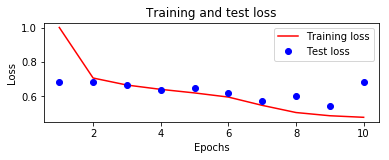

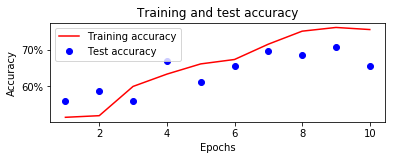

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Scenario 2: Small images

In [0]:
import cv2
x2 = []
y2 = []
for i in range(len(x)):
  img = cv2.resize(x[i],(50,50))
  x2.append(img)
  img_label = np.where(y[i]=="male",1,0)
  y2.append(img_label)

In [0]:
np.array(x2).shape

(1750, 50, 50, 3)

In [0]:
x2 = np.array(x2)
x2 = x2.reshape(x2.shape[0],x2.shape[1],x2.shape[2],3)

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 512)        

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X = np.array(x2)/255
Y = np.array(y2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

history = model.fit(X_train, y_train, batch_size=32,epochs=10,verbose=1,validation_data = (X_test, y_test))

Train on 1575 samples, validate on 175 samples
Epoch 1/10
1575/1575 [==============================] - 2s 2ms/step - loss: 0.7016 - acc: 0.5041 - val_loss: 0.6932 - val_acc: 0.4400
Epoch 2/10
1575/1575 [==============================] - 1s 937us/step - loss: 0.6932 - acc: 0.5035 - val_loss: 0.6923 - val_acc: 0.5600
Epoch 3/10
1575/1575 [==============================] - 1s 934us/step - loss: 0.6922 - acc: 0.5175 - val_loss: 0.6781 - val_acc: 0.6229
Epoch 4/10
1575/1575 [==============================] - 1s 938us/step - loss: 0.6811 - acc: 0.5727 - val_loss: 0.6626 - val_acc: 0.5829
Epoch 5/10
1575/1575 [==============================] - 1s 920us/step - loss: 0.6239 - acc: 0.6495 - val_loss: 0.6103 - val_acc: 0.6914
Epoch 6/10
1575/1575 [==============================] - 1s 937us/step - loss: 0.5918 - acc: 0.6883 - val_loss: 0.6036 - val_acc: 0.6514
Epoch 7/10
1575/1575 [==============================] - 1s 929us/step - loss: 0.5376 - acc: 0.7187 - val_loss: 0.5520 - val_acc: 0.7029
Epo

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


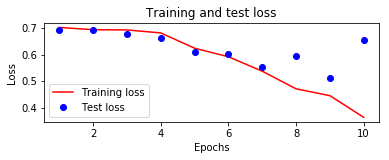

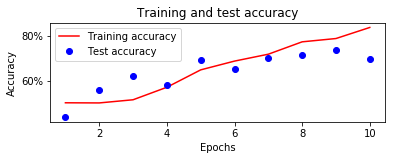

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Aggressive pooling on big images

In [0]:
x2 = []
y2 = []
for i in range(len(x)):
  x2.append(x[i])
  img_label = np.where(y[i]=="male",1,0)
  y2.append(img_label)

In [0]:
x2 = np.array(x2)
x2 = x2.reshape(x2.shape[0],x2.shape[1],x2.shape[2],3)

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(300,300,3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 99, 99, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 33, 33, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 33, 33, 256)       295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 512)      

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X = np.array(x2)/255
Y = np.array(y2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

history = model.fit(X_train, y_train, batch_size=32,epochs=10,verbose=1,validation_data = (X_test, y_test))

Train on 1575 samples, validate on 175 samples
Epoch 1/10
1575/1575 [==============================] - 16s 10ms/step - loss: 0.7360 - acc: 0.5003 - val_loss: 0.6927 - val_acc: 0.4800
Epoch 2/10
1575/1575 [==============================] - 13s 8ms/step - loss: 0.6899 - acc: 0.5537 - val_loss: 0.6894 - val_acc: 0.5771
Epoch 3/10
1575/1575 [==============================] - 13s 8ms/step - loss: 0.6752 - acc: 0.5962 - val_loss: 0.6536 - val_acc: 0.6400
Epoch 4/10
1575/1575 [==============================] - 13s 8ms/step - loss: 0.6445 - acc: 0.6502 - val_loss: 0.6206 - val_acc: 0.6971
Epoch 5/10
1575/1575 [==============================] - 13s 8ms/step - loss: 0.6092 - acc: 0.6686 - val_loss: 0.7497 - val_acc: 0.6057
Epoch 6/10
1575/1575 [==============================] - 13s 8ms/step - loss: 0.6242 - acc: 0.6686 - val_loss: 0.6054 - val_acc: 0.6400
Epoch 7/10
1575/1575 [==============================] - 13s 8ms/step - loss: 0.5809 - acc: 0.6946 - val_loss: 0.5921 - val_acc: 0.6514
Epoch 8

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


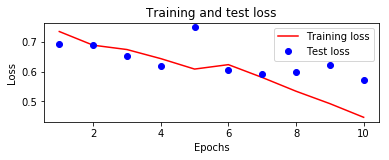

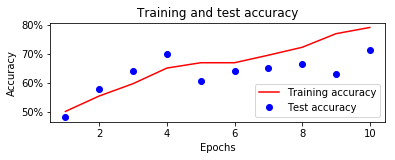

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# VGG16 architecture

In [0]:
from keras.applications import vgg16
from keras.utils.vis_utils import plot_model
from keras.applications.vgg16 import preprocess_input
vgg16_model = vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(300,300,3))

In [0]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [0]:
import cv2
x2_vgg16 = []
for i in range(len(x)):
    if(i%100 == 0):
      print(i)
    img = x[i]
    img = preprocess_input(img.reshape(1,300,300,3))
    img_new = vgg16_model.predict(img.reshape(1,300,300,3))
    x2_vgg16.append(img_new)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [0]:
x2_vgg16 = np.array(x2_vgg16)
x2_vgg16.shape

(1750, 1, 9, 9, 512)

In [0]:
x2_vgg16= x2_vgg16.reshape(x2_vgg16.shape[0],x2_vgg16.shape[2],x2_vgg16.shape[3],x2_vgg16.shape[4])
x2_vgg16.shape

(1750, 9, 9, 512)

In [0]:
Y = np.array(y2)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2_vgg16,Y, test_size=0.1, random_state=42)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1575, 9, 9, 512) (175, 9, 9, 512) (1575,) (175,)


In [0]:
np.max(X_train)

691.86755

In [0]:
model_vgg16 = Sequential()
model_vgg16.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
model_vgg16.add(MaxPooling2D(pool_size=(2, 2)))
model_vgg16.add(Flatten())
model_vgg16.add(Dense(512, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(1, activation='sigmoid'))
model_vgg16.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 7, 7, 512)         2359808   
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               2359808   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total

In [0]:
model_vgg16.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
np.mean(y_train)

0.49206349206349204

In [0]:
history_vgg16 = model_vgg16.fit(X_train/np.max(X_train), y_train, batch_size=16,epochs=10,verbose=1,validation_data = (X_test/np.max(X_train), y_test))

Train on 1575 samples, validate on 175 samples
Epoch 1/10
1575/1575 [==============================] - 3s 2ms/step - loss: 0.3435 - acc: 0.8425 - val_loss: 0.2593 - val_acc: 0.8857
Epoch 2/10
1575/1575 [==============================] - 2s 1ms/step - loss: 0.1245 - acc: 0.9537 - val_loss: 0.2419 - val_acc: 0.8629
Epoch 3/10
1575/1575 [==============================] - 2s 1ms/step - loss: 0.0372 - acc: 0.9917 - val_loss: 0.3236 - val_acc: 0.8971
Epoch 4/10
1575/1575 [==============================] - 2s 1ms/step - loss: 0.0118 - acc: 0.9987 - val_loss: 0.3688 - val_acc: 0.8857
Epoch 5/10
1575/1575 [==============================] - 2s 1ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.4578 - val_acc: 0.8914
Epoch 6/10
1575/1575 [==============================] - 2s 1ms/step - loss: 8.8385e-04 - acc: 1.0000 - val_loss: 0.4928 - val_acc: 0.8971
Epoch 7/10
1575/1575 [==============================] - 2s 1ms/step - loss: 5.4146e-04 - acc: 1.0000 - val_loss: 0.5145 - val_acc: 0.8971
Epoch 8

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


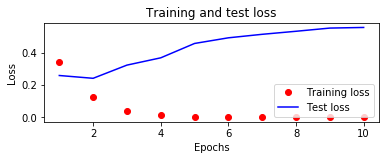

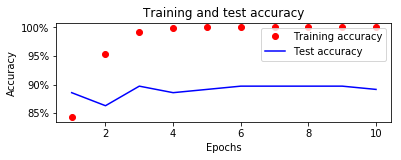

In [0]:
history_dict = history_vgg16.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history_vgg16.history['loss'], 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history_vgg16.history['acc'], 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [0]:
y_pred = model_vgg16.predict(X_test/np.max(X_train))
y_pred.shape

(175, 1)

In [0]:
np.abs(y_pred.flatten()-y_test)[27]

2.384185791015625e-07

In [0]:
np.argsort(np.abs(y_pred.flatten()-y_test))

array([  0,  86,  85,  81,  80,  79,  78,  77,  76,  75,  70,  65,  63,
        58,  55,  54,  89,  93,  95,  97, 170, 161, 153, 151, 150, 149,
       145,  44, 137, 130, 125, 123, 115, 109, 106, 101, 132,  38, 174,
        28,   3,  30,   6,   1,   9,  25,  34,   5,   2,  12, 166,  11,
        16, 117,  27, 159, 142, 144, 160, 154,  40, 140,  94, 143,  74,
        66, 162, 124,  90,  72,  51,  99,  57, 169, 171, 121, 111,  60,
       146,  22, 112, 136,  26, 172, 105, 107, 134, 148, 138, 113, 114,
        96,  73, 158,  47, 122,  39, 118,   4, 131,  10, 128,  91, 104,
       173, 127,  18, 119, 164, 157, 100,   7,  64, 120,  87,  68,  71,
        88, 126,  15, 102,  59, 163,  53, 141,  23, 139,  49,  69,  37,
        62,  67,  41, 152,  20,  43, 108,  50,  98,   8,  84,  92,  31,
        33,  45,  56,  24,  61, 155, 168,  42, 116,  82,  17, 103, 165,
        48,  29, 156, 167,  19,  14,  52,  21, 129,  46, 133,  83, 147,
        32, 135,  13,  35, 110,  36])

In [0]:
y_pred2 = np.where(y_pred>0.5,1,0)

In [0]:
from sklearn.model_selection import train_test_split
img_train, img_test, y_train, y_test = train_test_split(x,Y, test_size=0.1, random_state=42)

In [0]:
y_test_char = np.where(y_test==0,'F','M')

In [0]:
y_pred_char = np.where(y_pred>0.5,'M','F')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


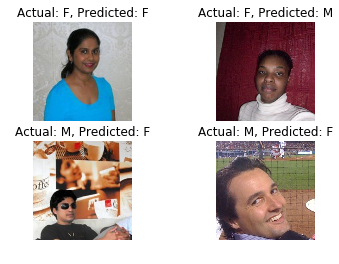

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(img_test[85])
plt.title('Actual: '+str(y_test_char[85])+', '+'Predicted: '+str((y_pred_char[85][0])))
plt.grid('off')
plt.axis('off')
plt.subplot(222)
plt.title('Actual: '+str(y_test_char[32])+', '+'Predicted: '+str((y_pred_char[32][0])))
plt.imshow(img_test[32])
plt.grid('off')
plt.axis('off')
plt.subplot(223)
plt.title('Actual: '+str(y_test_char[83])+', '+'Predicted: '+str((y_pred_char[83][0])))
plt.imshow(img_test[83])
plt.grid('off')
plt.axis('off')
plt.subplot(224)
plt.title('Actual: '+str(y_test_char[46])+', '+'Predicted: '+str((y_pred_char[46][0])))
plt.imshow(img_test[46])
plt.grid('off')
plt.axis('off')
plt.show()

# VGG19 architecture

In [0]:
from keras.applications import vgg19
from keras.utils.vis_utils import plot_model
from keras.applications.vgg19 import preprocess_input
vgg19_model = vgg19.VGG19(include_top=False, weights='imagenet',input_shape=(300,300,3))

vgg19_model.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
______________________________________________________________

In [0]:
import cv2
x2 = []
for i in range(len(x)):
    if(i%100 == 0):
      print(i)
    img = x[i]
    img = preprocess_input(img.reshape(1,300,300,3))
    img_new = vgg19_model.predict(img.reshape(1,300,300,3))
    x2.append(img_new)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [0]:
x2 = np.array(x2)
x2.shape

(1750, 1, 9, 9, 512)

In [0]:
x2= x2.reshape(x2.shape[0],x2.shape[2],x2.shape[3],x2.shape[4])
x2.shape

(1750, 9, 9, 512)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2,Y, test_size=0.1, random_state=42)

In [0]:
model_vgg19 = Sequential()
model_vgg19.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
model_vgg19.add(MaxPooling2D(pool_size=(2, 2)))
model_vgg19.add(Flatten())
model_vgg19.add(Dense(512, activation='relu'))
model_vgg19.add(Dropout(0.5))
model_vgg19.add(Dense(1, activation='sigmoid'))
model_vgg19.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 7, 7, 512)         2359808   
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               2359808   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 513       
Total params: 4,720,129
Trainable params: 4,720,129
Non-trainable params: 0
____________________________________________

In [0]:
model_vgg19.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
history_vgg19 = model_vgg19.fit(X_train/np.max(X_train), y_train, batch_size=16,epochs=10,verbose=1,validation_data = (X_test/np.max(X_train), y_test))

Train on 1575 samples, validate on 175 samples
Epoch 1/10
1575/1575 [==============================] - 2s 2ms/step - loss: 0.3431 - acc: 0.8527 - val_loss: 0.3056 - val_acc: 0.8686
Epoch 2/10
1575/1575 [==============================] - 2s 1ms/step - loss: 0.1397 - acc: 0.9473 - val_loss: 0.3225 - val_acc: 0.8514
Epoch 3/10
1575/1575 [==============================] - 2s 1ms/step - loss: 0.0483 - acc: 0.9873 - val_loss: 0.4494 - val_acc: 0.8800
Epoch 4/10
1575/1575 [==============================] - 2s 1ms/step - loss: 0.0182 - acc: 0.9956 - val_loss: 0.5383 - val_acc: 0.8629
Epoch 5/10
1575/1575 [==============================] - 2s 1ms/step - loss: 0.0139 - acc: 0.9968 - val_loss: 0.5292 - val_acc: 0.8686
Epoch 6/10
1575/1575 [==============================] - 2s 1ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.6105 - val_acc: 0.8686
Epoch 7/10
1575/1575 [==============================] - 2s 1ms/step - loss: 7.0058e-04 - acc: 1.0000 - val_loss: 0.6375 - val_acc: 0.8686
Epoch 8/10


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


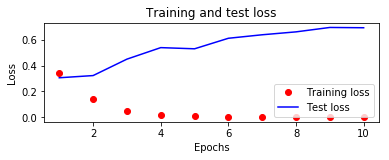

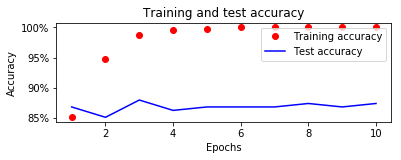

In [0]:
history_dict = history_vgg19.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history_vgg19.history['loss'], 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history_vgg19.history['acc'], 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [0]:
y_pred = model_vgg19.predict(X_test/np.max(X_train))

In [0]:
np.argsort(np.abs(y_pred.flatten() - y_test))

array([  0, 106,  30, 101,  95,  34,  94,  93,  89,  38,  86,  28,  85,
        79,  78,  44,  77,  75,  70,  66,  64,  63,  58,  80,  55,  27,
       145,   1, 170,   5, 161, 151, 149,  11, 140, 137,  54, 121, 132,
       130, 109, 125, 115,  16, 123,  26,  25,  76,  99, 134, 118,   3,
       166, 146,   2, 174,  12,  74, 111,  62, 117, 150, 105, 153,  65,
       136, 159, 108, 142, 143, 160,  10, 158, 144, 112,  88,  97, 122,
       114,  22,   9, 169,  18, 172,  73, 102, 141,  91,  71, 126,  90,
       107,  60,  37,  23,   7, 162, 138,  41,  92,  96,   4,  50, 128,
       163,  42, 152, 171, 173,   8,  69,  72,  57,  47,   6,  53,  20,
       120, 164, 113, 116, 148, 100,  33, 127,  68,  29, 131,  45, 124,
       154, 155,  51,  81,  59, 139,  56,  15,  43, 157, 104,  49,  67,
        19, 168,  40,  21,  31,  82,  46,  84, 119, 156, 147,  83,  24,
        39,  32,  14, 165,  98,  48,  17, 167,  52, 103,  35,  87, 110,
        61, 129,  13, 135, 133,  36])

In [0]:
y_pred_char = np.where(y_pred>0.5,'M','F')
y_test_char = np.where(y_test==0,'F','M')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


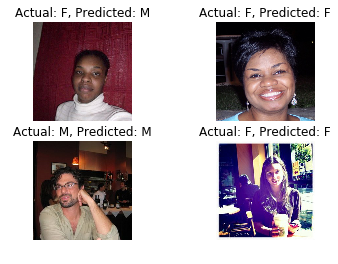

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(img_test[32])
plt.title('Actual: '+str(y_test_char[32])+', '+'Predicted: '+str((y_pred_char[32][0])))
plt.grid('off')
plt.axis('off')
plt.subplot(222)
plt.title('Actual: '+str(y_test_char[119])+', '+'Predicted: '+str((y_pred_char[119][0])))
plt.imshow(img_test[119])
plt.grid('off')
plt.axis('off')
plt.subplot(223)
plt.title('Actual: '+str(y_test_char[107])+', '+'Predicted: '+str((y_pred_char[107][0])))
plt.imshow(img_test[107])
plt.grid('off')
plt.axis('off')
plt.subplot(224)
plt.title('Actual: '+str(y_test_char[71])+', '+'Predicted: '+str((y_pred_char[71][0])))
plt.imshow(img_test[71])
plt.grid('off')
plt.axis('off')
plt.show()

# Inception v3 architecture

In [0]:
from keras.applications import inception_v3
from keras.applications.inception_v3 import preprocess_input
from keras.utils.vis_utils import plot_model
inception_model = inception_v3.InceptionV3(include_top=False, weights='imagenet',input_shape=(300,300,3))

inception_model.summary()




87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_15[0][0]                  
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
____________________

In [0]:
import cv2
x2 = []
for i in range(len(x)):
    if(i%100 == 0):
      print(i)
    img = x[i]
    img = preprocess_input(img.reshape(1,300,300,3))
    img_new = inception_model.predict(img.reshape(1,300,300,3))
    x2.append(img_new)
	
x2 = np.array(x2)
x2.shape

x2= x2.reshape(x2.shape[0],x2.shape[2],x2.shape[3],x2.shape[4])
x2.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2,Y, test_size=0.1, random_state=42)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [0]:
model_inception_v3 = Sequential()
model_inception_v3.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
model_inception_v3.add(MaxPooling2D(pool_size=(2, 2)))
model_inception_v3.add(Flatten())
model_inception_v3.add(Dense(512, activation='relu'))
model_inception_v3.add(Dropout(0.5))
model_inception_v3.add(Dense(1, activation='sigmoid'))
model_inception_v3.summary()

model_inception_v3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history_inception_v3 = model_inception_v3.fit(X_train/np.max(X_train), y_train, batch_size=16,epochs=10,verbose=1,validation_data = (X_test/np.max(X_train), y_test))	

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 6, 6, 512)         9437696   
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               2359808   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 513       
Total params: 11,798,017
Trainable params: 11,798,017
Non-trainable params: 0
__________________________________________

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


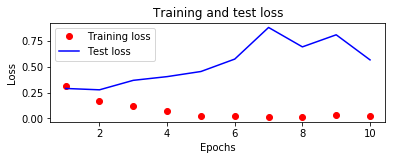

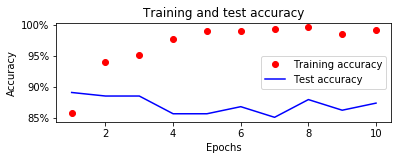

In [0]:
history_dict = history_inception_v3.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history_inception_v3.history['loss'], 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history_inception_v3.history['acc'], 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# ResNet 50 architecture

In [0]:
from keras.applications import resnet50
from keras.applications.resnet50 import preprocess_input
resnet50_model = resnet50.ResNet50(include_top=False, weights='imagenet',input_shape=(300,300,3))

resnet50_model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 150, 150, 64) 256         conv1[0][0]                      
__________________________

In [0]:
import cv2
x2 = []
for i in range(len(x)):
    if(i%100 == 0):
      print(i)
    img = x[i]
    img = preprocess_input(img.reshape(1,300,300,3))
    img_new = resnet50_model.predict(img.reshape(1,300,300,3))
    x2.append(img_new)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [0]:
x2 = np.array(x2)
x2.shape

(1750, 1, 10, 10, 2048)

In [0]:
x2= x2.reshape(x2.shape[0],x2.shape[2],x2.shape[3],x2.shape[4])
x2.shape

(1750, 10, 10, 2048)

In [0]:
Y = np.array(y2)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2,Y, test_size=0.1, random_state=42)

In [0]:
model_resnet50 = Sequential()
model_resnet50.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
model_resnet50.add(MaxPooling2D(pool_size=(2, 2)))
model_resnet50.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model_resnet50.add(MaxPooling2D(pool_size=(2, 2)))
model_resnet50.add(Flatten())
model_resnet50.add(Dense(512, activation='relu'))
model_resnet50.add(Dropout(0.5))
model_resnet50.add(Dense(1, activation='sigmoid'))
model_resnet50.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 8, 8, 512)         9437696   
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 2, 2, 512)         2359808   
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)              

In [0]:
model_resnet50.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
np.max(X_train)

119.0767

In [0]:
history_resnet50 = model_resnet50.fit(X_train/np.max(X_train), y_train, batch_size=32,epochs=10,verbose=1,validation_data = (X_test/np.max(X_train), y_test))	

Train on 1575 samples, validate on 175 samples
Epoch 1/10
1575/1575 [==============================] - 8s 5ms/step - loss: 0.3271 - acc: 0.8622 - val_loss: 0.2995 - val_acc: 0.8686
Epoch 2/10
1575/1575 [==============================] - 3s 2ms/step - loss: 0.1373 - acc: 0.9537 - val_loss: 0.3089 - val_acc: 0.8971
Epoch 3/10
1575/1575 [==============================] - 3s 2ms/step - loss: 0.0653 - acc: 0.9784 - val_loss: 0.7223 - val_acc: 0.8457
Epoch 4/10
1575/1575 [==============================] - 3s 2ms/step - loss: 0.0480 - acc: 0.9829 - val_loss: 0.5042 - val_acc: 0.9029
Epoch 5/10
1575/1575 [==============================] - 3s 2ms/step - loss: 0.0381 - acc: 0.9873 - val_loss: 0.4028 - val_acc: 0.8971
Epoch 6/10
1575/1575 [==============================] - 3s 2ms/step - loss: 0.0382 - acc: 0.9867 - val_loss: 0.3643 - val_acc: 0.8971
Epoch 7/10
1575/1575 [==============================] - 3s 2ms/step - loss: 0.0185 - acc: 0.9949 - val_loss: 0.5269 - val_acc: 0.8971
Epoch 8/10
1575

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


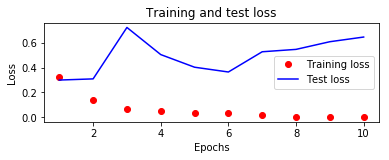

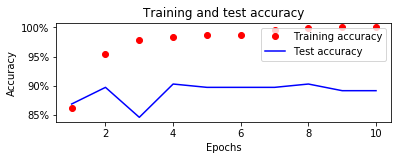

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history_resnet50.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history_resnet50.history['loss'], 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history_resnet50.history['acc'], 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Visualizing the output intermediate layers

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


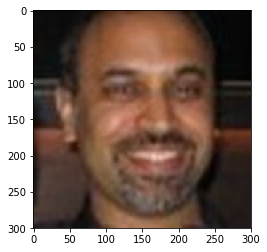

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x[3])
plt.grid('off')

In [0]:
np.max(X_train)

119.0767

In [0]:
from keras.applications.vgg16 import preprocess_input
model_vgg16.predict(vgg16_model.predict(preprocess_input(x[3].reshape(1,300,300,3)))/np.max(X_train))

array([[1.]], dtype=float32)

In [0]:
for layer in vgg16_model.layers:
  print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [0]:
from keras import models
activation_model = models.Model(inputs=vgg16_model.input,outputs=vgg16_model.layers[1].output)
activations = activation_model.predict(preprocess_input(x[3].reshape(1,300,300,3)))

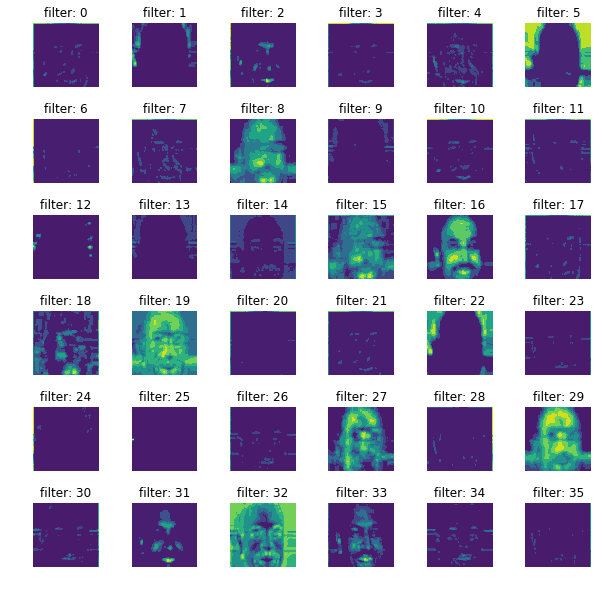

In [0]:
fig, axs = plt.subplots(6, 6, figsize=(10, 10))
fig.subplots_adjust(hspace = .5, wspace=.5)
first_layer_activation = activations[0]
for i in range(6):
  for j in range(6):
    try:
      axs[i,j].set_ylim((224, 0))
      axs[i,j].contourf(first_layer_activation[:,:,((6*i)+j)],6,cmap='viridis')
      axs[i,j].set_title('filter: '+str((6*i)+j))
      axs[i,j].axis('off')
    except:
      continue

In [0]:
activation_model = models.Model(inputs=vgg16_model.input,outputs=vgg16_model.layers[1].output)
activations = activation_model.predict(preprocess_input(np.array(x[:36]).reshape(36,300,300,3)))

In [0]:
fig, axs = plt.subplots(6, 6, figsize=(10, 10))
fig.subplots_adjust(hspace = .5, wspace=.5)
first_layer_activation = activations
for i in range(6):
  for j in range(6):
    try:
      axs[i,j].set_ylim((224, 0))
      axs[i,j].contourf(first_layer_activation[((6*i)+j),:,:,7],6,cmap='viridis')
      axs[i,j].set_title('filter: '+str((6*i)+j))
      axs[i,j].axis('off')
    except:
      continue

In [0]:
activation_model = models.Model(inputs=vgg16_model.input,outputs=vgg16_model.layers[-1].output)
activations = activation_model.predict(preprocess_input(x[3].reshape(1,300,300,3)))

In [0]:
last_layer_activation.shape

(1, 9, 9, 512)

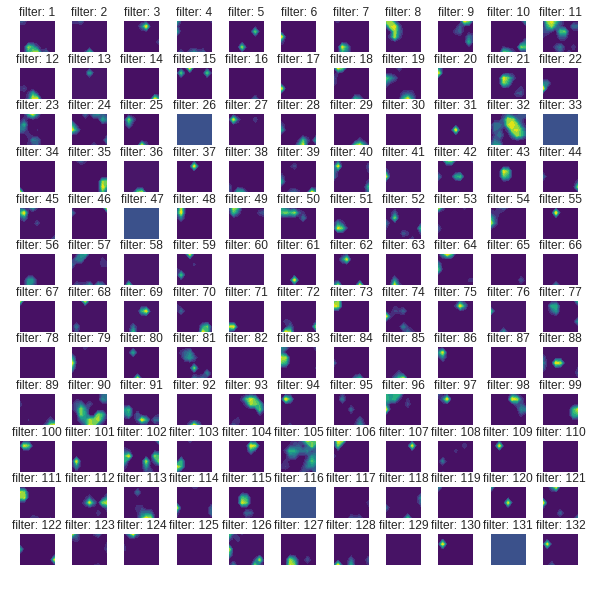

In [0]:
fig, axs = plt.subplots(12, 11, figsize=(10, 10))
fig.subplots_adjust(hspace = .5, wspace=.5)

last_layer_activation = activations
count = 0
for i in range(12):
  for j in range(11):
    try:
      count+=1
      axs[i,j].set_ylim((6, 0))
      axs[i,j].contourf(last_layer_activation[0,:,:,((12*i)+j)],11,cmap='viridis')
      axs[i,j].set_title('filter: '+str(count))
      axs[i,j].axis('off')
    except:
      continue